## Computer Vision and Cognitive Systems Group Project
### Virtual Try-On Complete Pipeline Execution
Group #13: Francesco Sala, Francesco Martucci, Felicia Puzone \
2022/2023

This demo aims to show the execution flow of the project pipeline. We start from some input images and progress step-by-step to the output image.


> Let us have a person image and a cloth image. The main goal is to replace the upper body cloth with the selected in-shop garment.



> First of all, let us import the git application repository and the python packages.



In [ ]:
!git clone https://github.com/felicia-puzone/virtual-try-on-app.git

Cloning into 'virtual-try-on-app'...
remote: Enumerating objects: 804, done.
remote: Counting objects: 100% (804/804), done.
remote: Compressing objects: 100% (649/649), done.
remote: Total 804 (delta 160), reused 764 (delta 133), pack-reused 0
Receiving objects: 100% (804/804), 5.24 MiB | 20.24 MiB/s, done.
Resolving deltas: 100% (160/160), done.


In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install ninja #for SCHP

!pip install einops tensorboardX

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 3.7 MB/s eta 0:00:00


In [ ]:
from PIL import Image, ImageOps, ImageDraw
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import json

In [ ]:
!unzip /content/gdrive/MyDrive/data.zip

Streaming output truncated to the last 5000 lines.
  inflating: data/in-shop-cloth/010726.pickle  
  inflating: data/in-shop-cloth/010740.pickle  
  inflating: data/in-shop-cloth/010743.pickle  
  inflating: data/in-shop-cloth/010747.pickle  
  inflating: data/in-shop-cloth/010750.pickle  
  inflating: data/in-shop-cloth/010751.pickle  
  inflating: data/in-shop-cloth/010755.pickle  
  inflating: data/in-shop-cloth/010757.pickle  
  inflating: data/in-shop-cloth/010758.pickle  
  inflating: data/in-shop-cloth/010760.pickle  
  inflating: data/in-shop-cloth/010764.pickle  
  inflating: data/in-shop-cloth/010767.pickle  
  inflating: data/in-shop-cloth/010771.pickle  
  inflating: data/in-shop-cloth/010772.pickle  
  inflating: data/in-shop-cloth/010773.pickle  
  inflating: data/in-shop-cloth/010774.pickle  
  inflating: data/in-shop-cloth/010777.pickle  
  inflating: data/in-shop-cloth/010782.pickle  
  inflating: data/in-shop-cloth/010783.pickle  
  inflating: data/in-shop-cloth/01078

In [ ]:
%cd virtual-try-on-app/

/content/virtual-try-on-app


In [ ]:

user_image_name = 'retr_example.png'
user_image_path = "/content/virtual-try-on-app/input_images"
data_path="/content/data"

For visualization:

In [ ]:
def plot_img_list(img_list):
    k = len(img_list)
    figure, ax = plt.subplots(nrows=1, ncols=k, figsize=(6, 6))

    for index in range(k):
        ax[index].imshow(img_list[index])

    figure.tight_layout()
    figure.show()
    plt.show()

> From the folder _input-images_, we first try the app on some images taken from the dataset DressCode, on which the application was trained.



# Garment selection: RETRIEVAL


> The user provides a picture of a person wearing a garment he would like to buy. The system provide similar items from a repository through a retrieval module.



/content/virtual-try-on-app/people-preprocessing
Evaluating total class number 18 with ['Background', 'Hat', 'Hair', 'Sunglasses', 'Upper-clothes', 'Skirt', 'Pants', 'Dress', 'Belt', 'Left-shoe', 'Right-shoe', 'Face', 'Left-leg', 'Right-leg', 'Left-arm', 'Right-arm', 'Bag', 'Scarf']
100% 1/1 [00:07<00:00,  7.39s/it]
/content/virtual-try-on-app


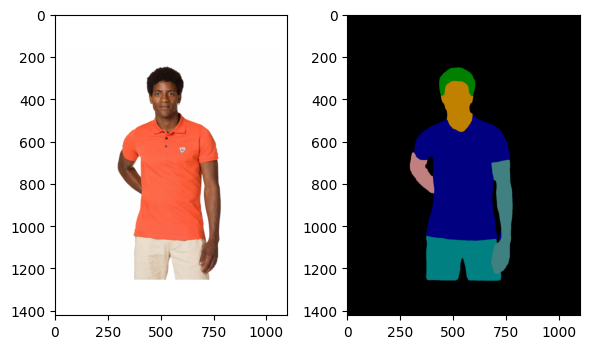

In [ ]:
%cd people-preprocessing/


!python simple_extractor.py --dataset 'atr' --input-dir ./../input_images/user_input --output-dir ./../input_images/output_schp --model-restore ./../../gdrive/MyDrive/exp-schp-201908301523-atr.pth

%cd ..
labels_image = cv2.imread(f"/content/virtual-try-on-app/input_images/output_schp/{user_image_name.split('_')[0]}_4.png")
labels_image = cv2.cvtColor(labels_image, cv2.COLOR_BGR2RGB)
person_image=cv2.imread(f"/content/virtual-try-on-app/input_images/user_input/{user_image_name}")
person_image = cv2.cvtColor(person_image, cv2.COLOR_BGR2RGB)
show_list = [person_image, labels_image]

plot_img_list(show_list)

In [ ]:
%cd /content/virtual-try-on-app/retrieval
!python predict.py --checkpoint_path /content/gdrive/MyDrive/SimilarityNet_synth_data_6.pth --image_path /content/virtual-try-on-app/input_images/user_input/retr_example.png --label_map_path /content/virtual-try-on-app/input_images/output_schp/retr_4.png --top_k 5 --repo_path /content/data/in-shop-cloth/

/content/virtual-try-on-app/retrieval
/content/gdrive/MyDrive/SimilarityNet_synth_data_6.pth
/content/virtual-try-on-app/input_images/user_input/retr_example.png
/content/virtual-try-on-app/input_images/output_schp/retr_4.png
/content/data/in-shop-cloth/
5
(6168,)
Found 358 possible matches.
[(PosixPath('/content/data/in-shop-cloth/003776.pickle'), tensor([[0.9499]], device='cuda:0')), (PosixPath('/content/data/in-shop-cloth/010959.pickle'), tensor([[0.9457]], device='cuda:0')), (PosixPath('/content/data/in-shop-cloth/000089.pickle'), tensor([[0.9279]], device='cuda:0')), (PosixPath('/content/data/in-shop-cloth/004267.pickle'), tensor([[0.9230]], device='cuda:0')), (PosixPath('/content/data/in-shop-cloth/006368.pickle'), tensor([[0.9135]], device='cuda:0'))]
/content/data/in-shop-cloth/003776_1.jpg
[ WARN:0@5.781] global loadsave.cpp:248 findDecoder imread_('/content/data/in-shop-cloth/003776_1.jpg'): can't open/read file: check file path/integrity
Traceback (most recent call last):
  

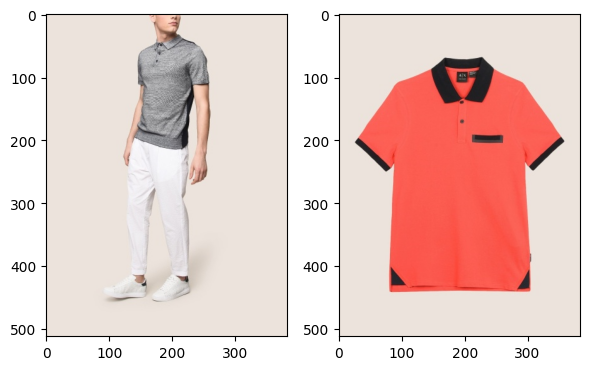

In [ ]:
retr_path="/content/virtual-try-on-app/retrieval/top_k_matches.txt"
retr_res=[]
with open('top_k_matches.txt', 'r') as out_file:
  retr_res.append(f"{out_file.readline()}_0.jpg")
for f in retr_res:
  cv2_imshow(f)


person_image = cv2.imread(r"input_images/people/000179_0.jpg")
cloth_image = cv2.imread(r"input_images/garments/000136_1.jpg")

cv2.imwrite('./result/images/000179_0.jpg', person_image)
cv2.imwrite('./result/cloth/000136_1.jpg', cloth_image)


person_image = cv2.cvtColor(person_image, cv2.COLOR_BGR2RGB)
cloth_image = cv2.cvtColor(cloth_image, cv2.COLOR_BGR2RGB)

show_list = [person_image, cloth_image]

plot_img_list(show_list)



> We apply some contrast adjusting and a bilateral filter to smooth the images.
 ### Contrast stretching
 $I_o = (I_i - min_i)*((max_o - min_o)/(max_i - min_i)) + min_o$

**Contrast stretching** is a simple image enhancement technique that attempts to improve the contrast in an image by `stretching' the range of intensity values it contains to span a desired range of values

A **bilateral filter** is a non-linear, edge-preserving, and noise-reducing smoothing filter for images. We believed this filter could enhance image quality and make them more like the training image examples.


In [ ]:
def ContrastStretching(img, min_o = 0, max_o = 255):

  out = (img - img.min())*((max_o - min_o)/(img.max() - img.min())) + min_o
  return out.astype(img.dtype)


In [ ]:


person_image_proc = ContrastStretching(person_image)

person_image_proc = cv2.bilateralFilter(person_image_proc, 20, 15, 15)

show_list = [person_image_proc, person_image]


plot_img_list(show_list)


NameError: ignored

## SCHP

In [ ]:
os.getcwd()

'/content/virtual-try-on-app'

In [ ]:
%cd people-preprocessing/

!python simple_extractor.py --dataset 'atr' --input-dir ./../input_images/people --output-dir ./../result/label_maps --model-restore ./../../gdrive/MyDrive/exp-schp-201908301523-atr.pth

%cd ..

/content/virtual-try-on-app/people-preprocessing
Traceback (most recent call last):
  File "/content/virtual-try-on-app/people-preprocessing/simple_extractor.py", line 15, in <module>
    import torch
  File "/usr/local/lib/python3.10/dist-packages/torch/__init__.py", line 1187, in <module>
    from .functional import *  # noqa: F403
  File "/usr/local/lib/python3.10/dist-packages/torch/functional.py", line 7, in <module>
    import torch.backends.opt_einsum as opt_einsum
  File "/usr/local/lib/python3.10/dist-packages/torch/backends/opt_einsum/__init__.py", line 9, in <module>
  File "/usr/local/lib/python3.10/dist-packages/opt_einsum/__init__.py", line 9, in <module>
    from .contract import contract, contract_path, contract_expression
  File "<frozen importlib._bootstrap>", line 1027, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1006, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 688, in _load_unlocked
  File "<frozen importlib._bootstrap

/content/virtual-try-on-app


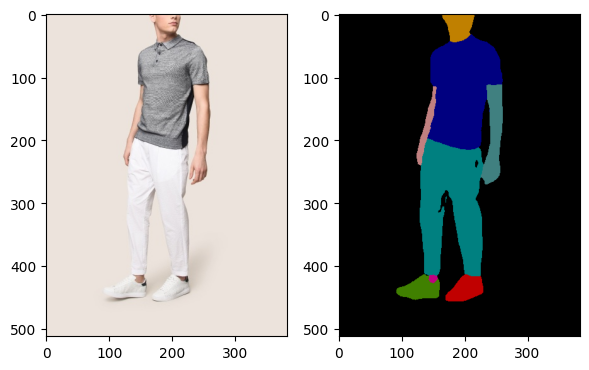

In [ ]:
%cd ..
labels_image = cv2.imread(r"./result/label_maps/000179_4.png")
labels_image = cv2.cvtColor(labels_image, cv2.COLOR_BGR2RGB)

show_list = [person_image, labels_image]

plot_img_list(show_list)

## Mask Image Generation
Now that we have the label map, we can use a simple function to generate the people mask, needed as input for the geometric and generative modules.

In [ ]:
os.getcwd()

'/content/virtual-try-on-app'

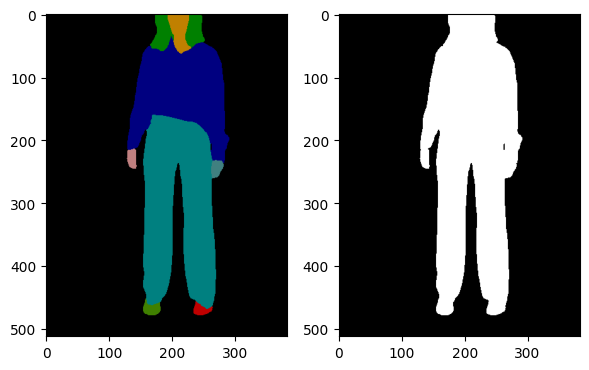

In [ ]:
def get_mask_from_labels(img):

    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    img[img != 0] = 255
    return img

mask_image = get_mask_from_labels(labels_image)

cv2.imwrite('./result/image-mask/000179_0.png', mask_image)

show_list = [labels_image, cv2.cvtColor(mask_image, cv2.COLOR_GRAY2RGB)]

plot_img_list(show_list)


## KEYPOINT EXTRACTION with Detectron2
Due to problems with openpose build (servers are off and the build failed because it could not download the coffeemodels), we adopted another strategy. We use Detectron2 keypoint extractor and then convert the keypoints order and we interpolate a missing keypoint.


In [ ]:
%cd ..

/content


In [ ]:
!python -m pip install pyyaml==5.1
import sys, os, distutils.core
# Note: This is a faster way to install detectron2 in Colab, but it does not include all functionalities (e.g. compiled operators).
# See https://detectron2.readthedocs.io/tutorials/install.html for full installation instructions
!git clone 'https://github.com/facebookresearch/detectron2'
dist = distutils.core.run_setup("./detectron2/setup.py")
!python -m pip install {' '.join([f"'{x}'" for x in dist.install_requires])}
sys.path.insert(0, os.path.abspath('./detectron2'))

# Properly install detectron2. (Please do not install twice in both ways)
# !python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.2/274.2 kB 5.8 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
Cloning into 'detectron2'...
remote: Enumerating objects: 15253, done.
remote: Counting objects: 100% (274/274), done.
remote: Compressing objects: 100% (195/195), done.
remote: Total 15253 (delta 143), reused 165 (delta 79), pack-reused 14979
Receiving objects: 100% (15253/15253), 6.28 MiB | 18.26 MiB/s, done.
Resolving deltas: 100% (11005/11005), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.2 MB/s eta 0:00:

In [ ]:
import torch, detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0
torch:  2.0 ; cuda:  cu118
detectron2: 0.6


In [ ]:
%cd virtual-try-on-app/

/content/virtual-try-on-app


In [ ]:
os.getcwd()

'/content'

In [ ]:
%cd detectron2_scripts/
import d2
%cd ..

/content/virtual-try-on-app/detectron2_scripts
/content/virtual-try-on-app


Getting the correct keypoints format ( [18,3] )

In [ ]:
openpose_keypoints = d2.get_keypoints(person_image)
openpose_keypoints.shape
#print(openpose_keypoints)

model_final_a6e10b.pkl: 237MB [00:01, 233MB/s]                           
/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


torch.Size([18, 3])

Now we put these keypoints into a formatted json.

In [ ]:
%cd ..

/content/virtual-try-on-app


In [ ]:
def json_parser(tensor_keypoints):

    parsed_list = []

    data = {}
    data['version'] = 1.0,
    data['people'] = {}
    data['people']['face_keypoints'] = []
    data['people']['pose_keypoints'] = []
    data['people']['hand_right_keypoints'] = []
    data['people']['hand_left_keypoints'] = []


    keypoints = tensor_keypoints.tolist()

    for keypoint in keypoints:

        if -1.0 not in keypoint[:3]: data['people']['pose_keypoints'].extend(keypoint[:3])
        else: data['people']['pose_keypoints'].extend([0,0,0])

        parsed_list.append(json.dumps(data))

    return json.dumps(data)


In [ ]:
with open("./result/keypoints-openpose/000179_2.json", "w") as outfile:
    outfile.write(json_parser(openpose_keypoints))

FileNotFoundError: ignored

We can also visualize the result with a drawing method.

In [ ]:
def draw_keypoints(tensor_keypoints, height, width, radius):
  point_num = tensor_keypoints.shape[0]
  r = radius
  im_pose = Image.new('L', (width, height))
  pose_draw = ImageDraw.Draw(im_pose)

  for i in range(point_num):

    pose_draw = ImageDraw.Draw(im_pose)
    pointx = tensor_keypoints[i, 0]
    pointy = tensor_keypoints[i, 1]
    if pointx > 1 and pointy > 1:
      pose_draw.rectangle((pointx-r, pointy-r, pointx+r, pointy+r), 'white', 'white')

  return im_pose


In [ ]:
im_pose = draw_keypoints(openpose_keypoints, 512, 384, 3)

show_list = [person_image, cv2.cvtColor(np.array(im_pose), cv2.COLOR_GRAY2RGB)]

plot_img_list(show_list)

So the person input is now ready. Next step is the cloth input set up.

## Cloth mask generation

Other than the garment image, the network needs the cloth image mask. For this task, we created a method that detects contours with Canny algorithm and fills the contours to generate a mask. We also used this function to generate masks for training. It can sometimes fail in connecting the contours properly, but in the majority of cases it works.

In [ ]:
def generateMask(img, sharpenLevel = 0):

    #ADJUSTING BRIGHTNESS/CONTRAST

    # define the contrast and brightness value
    contrast = 1.05    # Contrast control ( 0 to 127)
    brightness = 0.05  # Brightness control (0-100)

    # call addWeighted function. use beta = 0 to effectively only

    adjusted = cv2.addWeighted(img, contrast, img, 0, brightness)

    #Sharpening kernel 1
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

    if(sharpenLevel == 1):
        adjusted = cv2.filter2D(adjusted, -1, kernel)

    v = np.median(adjusted)
    sigma = 0.99

    lower_thresh = int(max(0, (1.0 - sigma) * v))
    upper_thresh = int(min(255, (1.0 + sigma) * v))

    edges = cv2.Canny(adjusted, 0, 255)

    edges = cv2.dilate(edges, np.ones((5, 5), np.uint8))

    contours, hierarchy = cv2.findContours(edges,
                                           cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    # Canny Edges After Contouring

    print("Number of Contours found = " + str(len(contours)))

    # Draw all contours
    # -1 signifies drawing all contours
    mask = np.zeros(img.shape, dtype=np.uint8)

    cv2.drawContours(mask, contours, 0, color=(255, 255, 255), thickness=cv2.FILLED)

    if (sharpenLevel == 1):
        mask = cv2.medianBlur(mask, 33)

    #computing White/Black Ratio

    mask_white_count = (mask==255).sum()
    mask_black_count = (mask==0).sum()

    wb_ratio = mask_white_count/mask_black_count

    return mask

In [ ]:
os.getcwd()

'/content'

Number of Contours found = 1


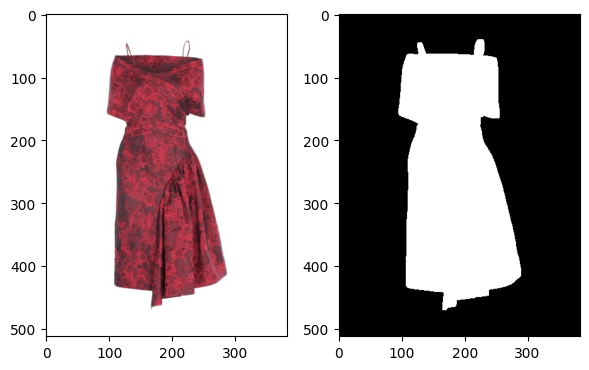

True

In [ ]:
cloth_mask = generateMask(np.array(cloth_image), sharpenLevel = 0)

show_list = [cloth_image, cloth_mask]

plot_img_list(show_list)
cv2.imwrite('./result/cloth-mask/000136_1.png', cloth_mask)

# GMM Inference

In [ ]:
%cd network

/content/virtual-try-on-app/network


In [ ]:
!pip install einops tensorboardX

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 4.7 MB/s eta 0:00:00


In [ ]:
import subprocess
import shutil
import time

t = time.time()
!python test.py --name GMM --stage GMM --workers 4 --dataroot ./../result --datamode test --data_list ./../result/inference.txt --checkpoint ./../../gdrive/MyDrive/step_115000_final2.pth

Namespace(name='GMM', dress_type='upper', gpu_ids='', workers=4, batch_size=4, dataroot='./../result', datamode='test', stage='GMM', data_list='./../result/inference.txt', fine_width=384, fine_height=512, radius=5, grid_size=10, tensorboard_dir='tensorboard', result_dir='result', checkpoint='./../../gdrive/MyDrive/step_115000_final2.pth', display_count=1, shuffle=False)
Start to test stage: GMM, named: GMM!
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
initialization method [normal]
initialization method [normal]
step:        1, time: 0.873
Finished test GMM, named

Showing the warping result:

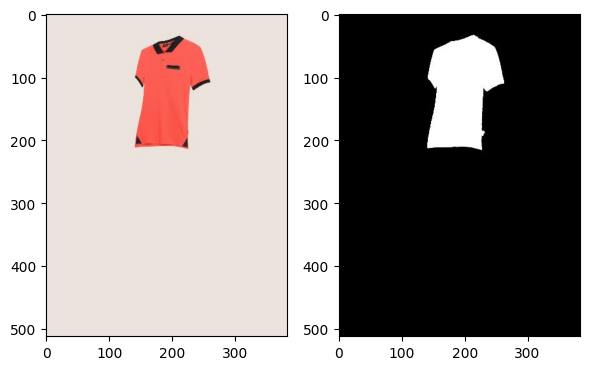

In [ ]:
warped_cloth = Image.open(r"result/GMM/test/warp-cloth/000179_0.jpg")
warped_mask = cv2.imread(r"result/GMM/test/warp-mask/000179_0.jpg")

cv2.cvtColor(np.array(warped_cloth), cv2.COLOR_BGR2RGB)

show_list3 = [warped_cloth, warped_mask]

plot_img_list(show_list3)

Try-On Module INFERENCE

In [ ]:
warp_cloth = "result/GMM/test/warp-cloth"
warp_mask = "result/GMM/test/warp-mask"

shutil.copytree(warp_cloth, "../result/warp-cloth", dirs_exist_ok=True)
shutil.copytree(warp_mask, "../result/warp-mask", dirs_exist_ok=True)

'../result/warp-mask'

# Try-on Module

In [ ]:
os.getcwd()

'/content/virtual-try-on-app/network'

In [ ]:
!python test.py --name TOM --stage TOM --workers 4 --datamode test --dataroot ./../result --data_list ./../result/inference.txt --checkpoint ./../../gdrive/MyDrive/CIT_final.pth

Namespace(name='TOM', dress_type='upper', gpu_ids='', workers=4, batch_size=4, dataroot='./../result', datamode='test', stage='TOM', data_list='./../result/inference.txt', fine_width=384, fine_height=512, radius=5, grid_size=10, tensorboard_dir='tensorboard', result_dir='result', checkpoint='./../../gdrive/MyDrive/CIT_final.pth', display_count=1, shuffle=False)
Start to test stage: TOM, named: TOM!
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
Dataset size: 00001!
step:        1, time: 1.988
Finished test TOM, named: TOM!


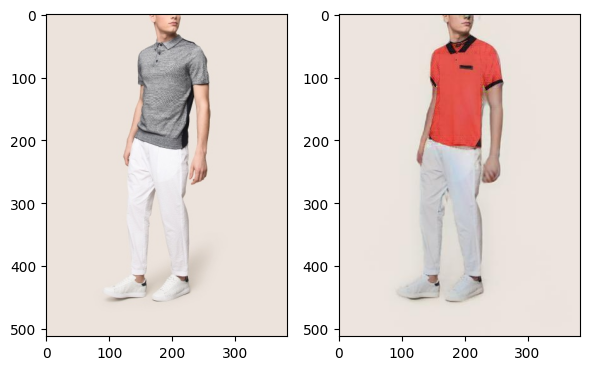

In [ ]:
tryon = cv2.imread(r"./result/TOM/test/try-on/000179_0.jpg")

try_on_path = "./result/TOM/test/try-on"

shutil.copytree(try_on_path, "./../result/tryon/ours", dirs_exist_ok=True)

tryon = cv2.cvtColor(tryon, cv2.COLOR_BGR2RGB)

show_list = [person_image, tryon]

plot_img_list(show_list)

# SUPER-RESOLUTION  with StableDiffusion

In [ ]:
%cd ..
%cd super-resolution
#!pip install diffusers accelerate transformers

/content/virtual-try-on-app
/content/virtual-try-on-app/super-resolution


In [ ]:
os.makedirs("./../result/super-resolution-output", exist_ok=True)

In [ ]:
from diffusers import ControlNetModel, DiffusionPipeline
from diffusers.utils import load_image
from diffusers.pipelines.stable_diffusion.safety_checker import StableDiffusionSafetyChecker

def resize_for_condition_image(input_image: Image, resolution: int):
    input_image = input_image.convert("RGB")
    W, H = input_image.size
    k = float(resolution) / min(H, W)
    H *= k
    W *= k
    H = int(round(H / 64.0)) * 64
    W = int(round(W / 64.0)) * 64
    img = input_image.resize((W, H), resample=Image.LANCZOS)
    return img

controlnet = ControlNetModel.from_pretrained('lllyasviel/control_v11f1e_sd15_tile',
                                             torch_dtype=torch.float16)
pipe = DiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5",
                                         custom_pipeline="stable_diffusion_controlnet_img2img",
                                         controlnet=controlnet,
                                         torch_dtype=torch.float16).to('cuda')
#pipe.enable_xformers_memory_efficient_attention()

source_image = load_image('./../result/tryon/ours/000179_0.jpg')

condition_image = resize_for_condition_image(source_image, 1024)
image = pipe(prompt="best quality, clothes, garment, model, shop, upper clothes",
             negative_prompt="blur, lowres, bad anatomy, bad clothes, bad hands, cropped, worst quality, fading, glitch, robot, tech, high saturation, medieval",
             image=condition_image,
             controlnet_conditioning_image=condition_image,
             width=condition_image.size[0],
             height=condition_image.size[1],
             strength=1.0,
             generator=torch.manual_seed(0),
             num_inference_steps=14,
            ).images[0]

image.save('./../result/super-resolution-output/000179.jpg')


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


  0%|          | 0/14 [00:00<?, ?it/s]

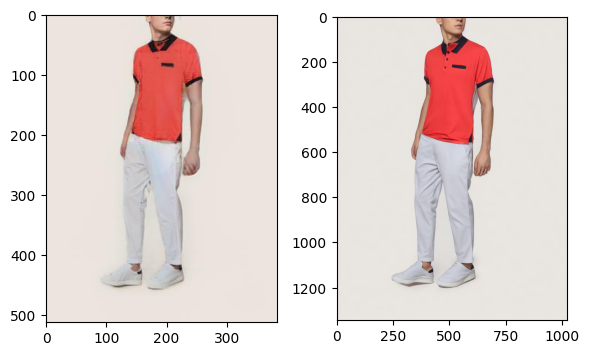

In [ ]:
super_resolution = Image.open('./../result/super-resolution-output/000179.jpg')

show_list = [tryon, super_resolution]

plot_img_list(show_list)

# Testing with a real world image


> The last part of this presentation is about testing the architecture on a picture taken with the smartphone and thus not belonging to the dataset. For this part, we also test the model trained on the _Dresses_ section of the dataset (not upper-body). The TOM module in this case is the one of cpvton+ due to save some training time.



In [ ]:
%cd ..

/content/virtual-try-on-app


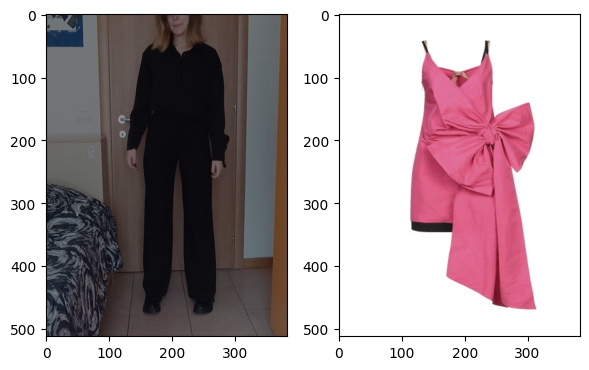

True

In [ ]:
person_image = cv2.imread(r"input_images/people/real_image_test.jpg")
cloth_image = cv2.imread(r"input_images/garments/044398_1.jpg")



person_image = cv2.cvtColor(person_image, cv2.COLOR_BGR2RGB)
cloth_image = cv2.cvtColor(cloth_image, cv2.COLOR_BGR2RGB)


show_list = [person_image, cloth_image]

plot_img_list(show_list)

person_image = cv2.cvtColor(person_image, cv2.COLOR_BGR2RGB)
cloth_image = cv2.cvtColor(cloth_image, cv2.COLOR_BGR2RGB)
cv2.imwrite('./result/cloth/044398_1.jpg', cloth_image)

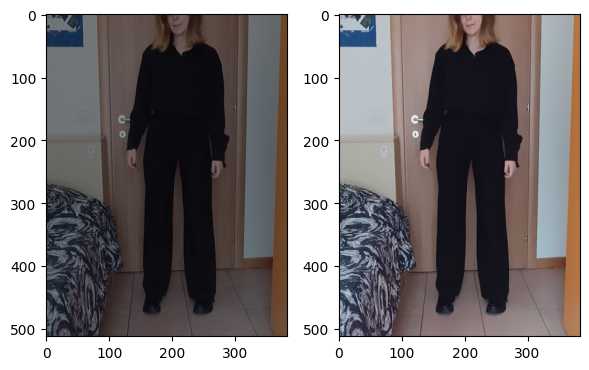

True

In [ ]:
person_image_proc = ContrastStretching(person_image)

person_image_proc = cv2.bilateralFilter(person_image_proc, 20, 15, 15)

person_image = cv2.cvtColor(person_image, cv2.COLOR_BGR2RGB)
person_image_proc = cv2.cvtColor(person_image_proc, cv2.COLOR_BGR2RGB)
show_list = [person_image, person_image_proc]
plot_img_list(show_list)


person_image_proc = cv2.cvtColor(person_image_proc, cv2.COLOR_BGR2RGB)
cv2.imwrite('./result/images/realimagetest_0.jpg', person_image_proc)





> As we can see, the quality of the image gets better after the initial processing if the light exposure or contrast are not so optimal.



### Segmentation

In [ ]:
os.getcwd()

'/content/virtual-try-on-app'

In [ ]:
%cd people-preprocessing/

!python simple_extractor.py --dataset 'atr' --input-dir ./../result/images --output-dir ./../result/label_maps --model-restore ./../../gdrive/MyDrive/exp-schp-201908301523-atr.pth

%cd ..

/content/virtual-try-on-app/people-preprocessing
Evaluating total class number 18 with ['Background', 'Hat', 'Hair', 'Sunglasses', 'Upper-clothes', 'Skirt', 'Pants', 'Dress', 'Belt', 'Left-shoe', 'Right-shoe', 'Face', 'Left-leg', 'Right-leg', 'Left-arm', 'Right-arm', 'Bag', 'Scarf']
 50% 1/2 [00:06<00:06,  6.67s/it]
Traceback (most recent call last):
  File "/content/virtual-try-on-app/people-preprocessing/simple_extractor.py", line 155, in <module>
    main()
  File "/content/virtual-try-on-app/people-preprocessing/simple_extractor.py", line 128, in main
    for idx, batch in enumerate(tqdm(dataloader)):
  File "/usr/local/lib/python3.10/dist-packages/tqdm/std.py", line 1182, in __iter__
    for obj in iterable:
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 633, in __next__
    data = self._next_data()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 677, in _next_data
    data = self._dataset_fetcher.fetch(i

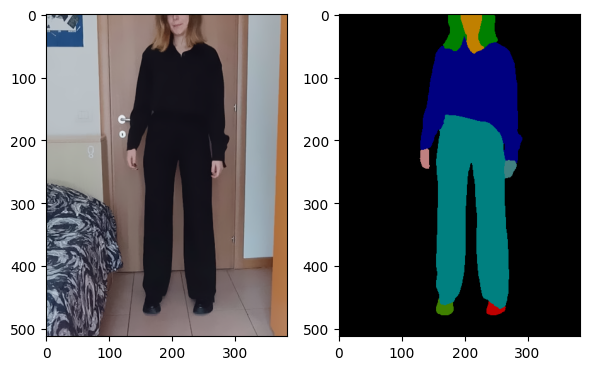

In [ ]:
labels_image = cv2.imread(r"./result/label_maps/realimagetest_4.png")

cv2.imwrite(r"./result/label_maps/realimagetestNoBG_4.png", labels_image)

labels_image = cv2.cvtColor(labels_image, cv2.COLOR_BGR2RGB)

person_image_proc = cv2.cvtColor(person_image_proc, cv2.COLOR_BGR2RGB)

show_list = [person_image_proc, labels_image]

plot_img_list(show_list)

### Getting Mask

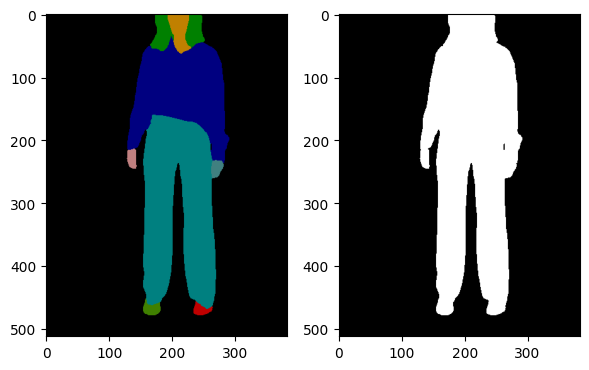

In [ ]:
mask_image = get_mask_from_labels(labels_image)

cv2.imwrite('./result/image-mask/realimagetestNoBG_0.png', mask_image)

show_list = [labels_image, cv2.cvtColor(mask_image, cv2.COLOR_GRAY2RGB)]

plot_img_list(show_list)


### Background removal

In [ ]:
def overlay_transparent(background, overlay, x, y):

    background_width = background.shape[1]
    background_height = background.shape[0]

    if x >= background_width or y >= background_height:
        return background

    h, w = overlay.shape[0], overlay.shape[1]

    if x + w > background_width:
        w = background_width - x
        overlay = overlay[:, :w]

    if y + h > background_height:
        h = background_height - y
        overlay = overlay[:h]

    if overlay.shape[2] < 4:
        overlay = np.concatenate(
            [
                overlay,
                np.ones((overlay.shape[0], overlay.shape[1], 1), dtype = overlay.dtype) * 255
            ],
            axis = 2,
        )

    overlay_image = overlay[..., :3]
    mask = overlay[..., 3:] / 255.0

    background[y:y+h, x:x+w] = (1.0 - mask) * background[y:y+h, x:x+w] + mask * overlay_image

    return background

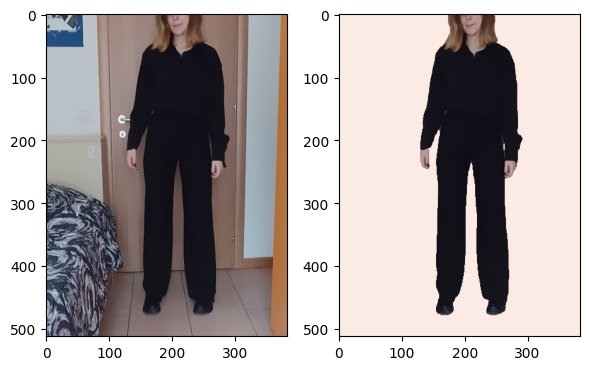

True

In [ ]:
background = np.full(person_image_proc.shape, (252,234,228), dtype='uint8')

transparent = np.zeros((person_image_proc.shape[0], person_image_proc.shape[1], 4), dtype=np.uint8)
transparent[:,:,0:3] = person_image_proc
transparent[:, :, 3] = mask_image

no_bg_person = transparent

merged_image = overlay_transparent(background, no_bg_person, 0, 0)

#no_bg_person = cv2.cvtColor(no_bg_person, cv2.COLOR_ABGR2ARGB)

show_list = [person_image_proc, merged_image]

plot_img_list(show_list)

merged_image_save = cv2.cvtColor(merged_image, cv2.COLOR_RGB2BGR)
cv2.imwrite('./result/images/realimagetestNoBG_0.jpg', merged_image_save)

### keypoints

In [ ]:
openpose_keypoints = d2.get_keypoints(merged_image)
openpose_keypoints.shape

model_final_a6e10b.pkl: 237MB [00:01, 177MB/s]                           
/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


torch.Size([18, 3])

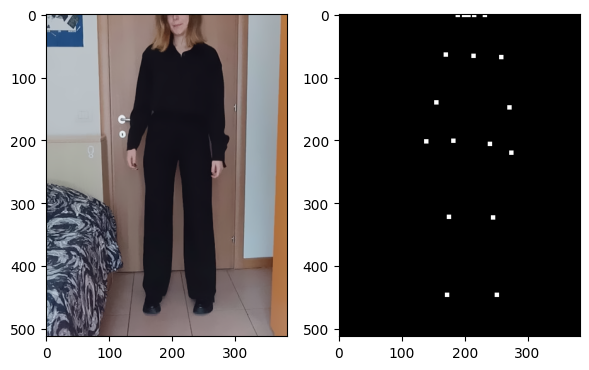

In [ ]:
im_pose = draw_keypoints(openpose_keypoints, 512, 384, 3)

show_list = [person_image_proc, cv2.cvtColor(np.array(im_pose), cv2.COLOR_GRAY2RGB)]

plot_img_list(show_list)

In [ ]:

with open("./result/keypoints-openpose/realimagetestNoBG_2.json", "w") as outfile:
    outfile.write(json_parser(openpose_keypoints))

### Cloth mask

Number of Contours found = 1


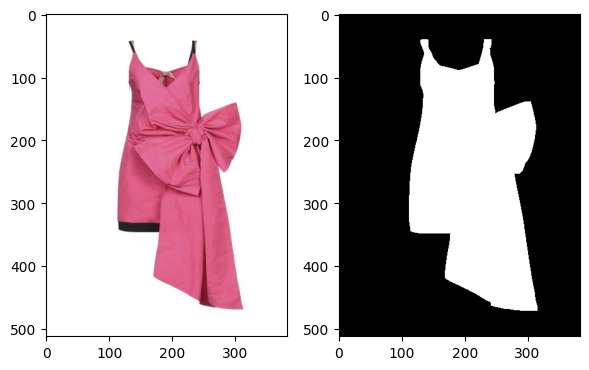

True

In [ ]:
cloth_mask = generateMask(np.array(cloth_image), sharpenLevel = 0)

cloth_image = cv2.cvtColor(cloth_image, cv2.COLOR_BGR2RGB)

show_list = [cloth_image, cloth_mask]

plot_img_list(show_list)

cv2.imwrite('./result/cloth-mask/044398_1.png', cloth_mask)

### Resizing all

True

### GMM

In [ ]:
%cd network

/content/virtual-try-on-app/network


In [ ]:
import subprocess
import shutil
import time

t = time.time()
!python test_cpvtonplus.py --name GMM --stage GMM --workers 4 --dress_type 'dresses' --dataroot ./../result --datamode test --data_list ./../result/inference_dress.txt --checkpoint ./../../gdrive/MyDrive/GMM_step_200000_dresses.pth

Namespace(name='GMM', dress_type='dresses', gpu_ids='', workers=4, batch_size=4, dataroot='./../result', datamode='test', stage='GMM', data_list='./../result/inference_dress.txt', fine_width=384, fine_height=512, radius=5, grid_size=10, tensorboard_dir='tensorboard', result_dir='result', checkpoint='./../../gdrive/MyDrive/GMM_step_200000_dresses.pth', display_count=1, shuffle=False)
Start to test stage: GMM, named: GMM!
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
initialization method [normal]
initialization method [normal]
step:        1, time: 0.574
Finished te

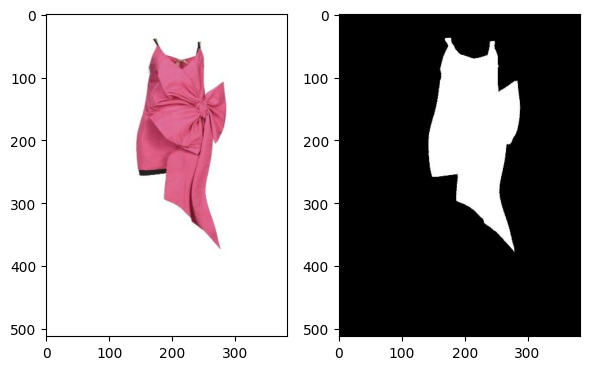

In [ ]:
warped_cloth = Image.open(r"result/GMM/test/warp-cloth/realimagetestNoBG_0.jpg")
warped_mask = cv2.imread(r"result/GMM/test/warp-mask/realimagetestNoBG_0.jpg")

cv2.cvtColor(np.array(warped_cloth), cv2.COLOR_BGR2RGB)

show_list3 = [warped_cloth, warped_mask]

plot_img_list(show_list3)

In [ ]:
warp_cloth = "result/GMM/test/warp-cloth"
warp_mask = "result/GMM/test/warp-mask"

shutil.copytree(warp_cloth, "../result/warp-cloth", dirs_exist_ok=True)
shutil.copytree(warp_mask, "../result/warp-mask", dirs_exist_ok=True)

'../result/warp-mask'

In [ ]:
os.getcwd()
%cd ..

/content/virtual-try-on-app


### TRY-ON (TO BE REFACTORED)

In [ ]:
%cd network/

/content/virtual-try-on-app/network


In [ ]:
!python test_cpvtonplus.py --name TOM --stage TOM --workers 4 --datamode test --dress_type 'dresses' --dataroot ./../result --data_list ./../result/inference_dress.txt --checkpoint ./../../gdrive/MyDrive/TOM_step_250000_dresses.pth

Namespace(name='TOM', dress_type='dresses', gpu_ids='', workers=4, batch_size=4, dataroot='./../result', datamode='test', stage='TOM', data_list='./../result/inference_dress.txt', fine_width=384, fine_height=512, radius=5, grid_size=10, tensorboard_dir='tensorboard', result_dir='result', checkpoint='./../../gdrive/MyDrive/TOM_step_250000_dresses.pth', display_count=1, shuffle=False)
Start to test stage: TOM, named: TOM!
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
Dataset size: 00001!
step:        1, time: 0.651
Finished test TOM, named: TOM!


In [ ]:
tryon = cv2.imread(r"./result/TOM/test/try-on/044398_1.jpg")

try_on_path = "./result/TOM/test/try-on"

shutil.copytree(try_on_path, "./../result/tryon/ours", dirs_exist_ok=True)

tryon = cv2.cvtColor(tryon, cv2.COLOR_BGR2RGB)

show_list = [person_image, tryon]

plot_img_list(show_list)

error: ignored